In [1]:
import pandas as pd
import numpy as np
import math
import random
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
import datetime

In [2]:
filename = "sap_storing_data_hu_project.csv" 
n = sum(1 for line in open(filename, encoding='utf8'))-1  
s = n//10
skip = sorted(random.sample(range(1, n+1), n-s))
df_not_cleaned = pd.read_csv(filename, skiprows=skip)
#verwijder alle kolommen die niet van gebruik zijn:
df = df_not_cleaned.drop(columns=['stm_sap_mon_meld_ddt', 'stm_mon_begin_ddt', 'stm_mon_toelichting_trdl', 'stm_oh_pg_mld', 'stm_geo_mld_uit_functiepl', 'stm_scenario_mon', 'stm_status_melding_sap', 'stm_mon_nr_status_omschr', 'stm_mon_nr__statuscode', 'stm_mon_nr_status_wijzdd', 'stm_aanntpl_ddt', 'stm_geo_gst_uit_functiepl', 'stm_objectdl_code_gst', 'stm_objectdl_groep_gst', 'stm_progfh_in_ddt', 'stm_progfh_in_invoer_ddt', 'stm_progfh_gw_ddt', 'stm_progfh_gw_lwd_ddt', 'stm_progfh_hz', 'stm_veroorz_groep', 'stm_veroorz_code', 'stm_progfh_gw_duur', 'stm_progfh_gw_lwd_tijd', 'stm_progfh_gw_lwd_datum', 'stm_progfh_gw_datum', 'stm_arbeid', 'stm_functiepl_gst', 'stm_functiepl_mld', 'stm_mon_begintijd', 'stm_mon_begindatum', 'stm_aangelegd_tijd', 'stm_aangelegd_dd', 'stm_dir_betrok_tr', 'stm_evb', 'stm_mon_vhdsincident', 'stm_mon_eind_ddt', 'stm_afspr_aanvangddt', 'stm_effect', 'stm_veroorz_tekst_kort', 'stm_projnr', 'stm_wbi_nummer', 'stm_status_gebr', 'stm_standplaats', 'stm_actie', 'stm_hinderwaarde', 'stm_rec_toegev_ddt', 'stm_afsluit_tijd', 'stm_afsluit_dd', 'stm_afsluit_ddt', 'stm_akkoord_melding_jn', 'stm_fact_jn', 'stm_status_sapnaarmon', 'stm_akkoord_mon_toewijz', 'stm_controle_dd', 'stm_mon_eind_tijd', 'stm_mon_eind_datum', 'stm_reactie_duur', 'stm_afspr_aanvangtijd', 'stm_afspr_aanvangdd', 'stm_historie_toelichting', 'stm_schade_verhaalb_jn', 'stm_x_bron_arch_dt', 'stm_x_bron_bestandsnaam', 'stm_x_bron_publ_dt', 'stm_rapportage_jaar', 'stm_rapportage_maand', 'stm_sorteerveld', 'stm_afspr_func_hersteltijd', 'stm_afspr_func_hersteldd', 'stm_relatiervo', 'stm_relatiervo_volgend', 'stm_relatiervo_vorig', 'stm_schade_statusdatum', 'stm_schade_status_ga', 'stm_schadenr', 'stm_x_start_sessie_dt', 'stm_x_bk', 'stm_x_run_id', 'stm_x_actueel_ind', 'stm_x_vervallen_ind'])
print("Done")

c:\users\game pc\appdata\local\programs\python\python37-32\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (11,19,21,25,32,36,37,38,39,40,47,48,55,75,78,80,82,83,86,87,99,102,108,109,110,111,113,116,118,121,122,124,129) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Done


# Data cleaning:


De te bepalen welke variabelen het meest van toepassing zijn om te gebruiken kijken we naar welke
kolommen informatie geven over de tijd van de melding, monteur. Tijd wanneer de melding word opgelost.
Wat voor melding het is en info over de melding/storing, en de locatie. Zo zijn de volgende kolommen
het meest van toepassing:

Over soort melding
- stm_sap_meldtekst (melding omschrijving)
- stm_geo_mld (melding code) - nodig
- stm_oorz_code (oorzaak code) - nodig
- stm_prioriteit (prioriteit)

Over tijd:
- stm_sap_melddatum (datump melding) - nodig
- stm_sap_meldtijd (tijdstip melding) - nodig
- stm_aanngeb_dd (datum aannemer gebeld)
- stm_aanngeb_tijd (tijd aannemer gebeld)
- stm_aanntpl_dd (datum aannemer op plek)
- stm_aanntpl_tijd (tijd aannemer op plek)

- stm_fh_dd (Datum van functie herstel) - nodig
- stm_fh_tijd (Tijdstip van functieherstel) - nodig
- stm_sap_storeinddatum (Datum einde storing) - nodig
- stm_sap_storeindtijd (Tijdstip einde storing) - nodig
- stm_fh_duur (Duur van functiehersteltijd) - nodig

Over equipment:
- stm_equipm_nr_mld (equipment)
- stm_equipm_omschr_mld (equipment omschrijving)

Over locatie
- stm_km_van_mld (locatie van)
- stm_km_tot_mld (locatie tot)
- stm_vl_post (VL post) - nodig
- stm_contractgeb_mld(locatie melding) - nodig
- stm_pplg_van (PPLG van locatie)
- stm_pplg_naar (PPLG tot locatie)
- stm_dstrglp_van (Dienstregelpunt van locatie)
- stm_dstrglp_naar (Dienstregelpunt tot locatie)

Over prognose:
- stm_progfh_in_datum (Datum prognose)
- stm_progfh_in_tijd (Tijdstip FHT prognose)
- stm_progfh_in_invoer_dat (Invoer datum prognose)
- stm_progfh_in_invoer_tijd (Invoer tijdstip FHT prognose)
- stm_progfh_in_duur (Duur FHT)



In [3]:
#deze functie verwijdert alle rijen waar geen value op de gegeven kolommen zitten
def drop_rows_with_null(lst, df):
    dfisnull = df.isnull()[lst]
    matches = dfisnull[(dfisnull).any(axis=1)]
    return df.drop(matches.index)

In [4]:
#Deze functie berkent de uitschiet grenzen
def uitschieters_bereken(kolom):
    q1 = kolom.quantile(0.25)
    q3 = kolom.quantile(0.75)
    iqr = q3 - q1
    maxuitschieter = q3 + (iqr*1.5)
    minuitschieter = q1 - (iqr*1.5)
    return maxuitschieter, minuitschieter

#Deze functie geeft de indexes van uitschieters in een kolom
def return_uitschieters_indexes(kolom):
    maxuitschieter = uitschieters_bereken(kolom)[0]
    minuitschieter = uitschieters_bereken(kolom)[1]
    uitschieters = [kolom[kolom > maxuitschieter].index, kolom[kolom < minuitschieter].index]
    return uitschieters
    
#Deze functie geeft een kolom zonder uitschieters
def return_kolom_zonder_uitschieters(kolom):
    maxuitschieter = uitschieters_bereken(kolom)[0]
    minuitschieter = uitschieters_bereken(kolom)[1]
    kolom = kolom[kolom < maxuitschieter][kolom > minuitschieter]
    return kolom


In [5]:
#Deze functie berkent de extreme uitschiet grenzen
def ex_uitschieters_bereken(kolom):
    q1 = kolom.quantile(0.25)
    q3 = kolom.quantile(0.75)
    iqr = q3 - q1
    maxuitschieter = q3 + (iqr*3)
    minuitschieter = q1 - (iqr*3)
    return maxuitschieter, minuitschieter

#Deze functie geeft de indexes van extreme uitschieters in een kolom
def return_ex_uitschieters_indexes(kolom):
    maxuitschieter = uitschieters_ex_bereken(kolom)[0]
    minuitschieter = uitschieters_ex_bereken(kolom)[1]
    uitschieters = [kolom[kolom > maxuitschieter].index, kolom[kolom < minuitschieter].index]
    return uitschieters
    
#Deze functie geeft een kolom zonder extreme uitschieters
def return_kolom_zonder_ex_uitschieters(kolom):
    maxuitschieter = uitschieters_ex_bereken(kolom)[0]
    minuitschieter = uitschieters_ex_bereken(kolom)[1]
    kolom = kolom[kolom < maxuitschieter][kolom > minuitschieter]
    return kolom



In [6]:
# Verwijder de rijen die geen value bevatten in de benodigde kolommen
df_filtered = drop_rows_with_null(['stm_geo_mld', 'stm_sap_melddatum', 'stm_oorz_code', 'stm_sap_meldtijd',
                          'stm_fh_dd', 'stm_fh_tijd', 'stm_sap_storeinddatum', 'stm_sap_storeindtijd',
                          'stm_fh_duur', 'stm_vl_post', 'stm_contractgeb_mld'], df)
print(len(df))
print(len(df_filtered))
df_filtered

89853
13305


,Unnamed: 0,#stm_sap_meldnr,stm_mon_nr,stm_vl_post,stm_sap_meld_ddt,stm_sap_meldtekst_lang,stm_sap_meldtekst,stm_geo_mld,stm_equipm_nr_mld,stm_equipm_soort_mld,...,stm_fh_dd,stm_fh_tijd,stm_fh_duur,stm_sap_storeinddatum,stm_sap_storeindtijd,stm_oorz_tekst_kort,stm_pplg_van,stm_pplg_naar,stm_dstrglp_van,stm_dstrglp_naar
37,304,50053724,179.0,ZL,30/01/2006 15:41:00,Logboeknr RBV : 179 Tijd: 1541 VL-Post: ...,Logboeknr RBV : 179 Tijd: 1541 VL-P,606,10211721.0,OVERWEG,...,30/01/2006,15:43:00,2.0,30/01/2006,15:43:00,NaN,NaN,NaN,Aml,NaN
44,389,50053843,359.0,AMR,07/02/2006 16:18:00,Logboeknr RBV : 359 Tijd: 1618 VL-Post: ...,Logboeknr RBV : 359 Tijd: 1618 VL-P,82,10553007.0,BEV_KABEL,...,07/02/2006,16:21:00,3.0,07/02/2006,16:21:00,Muizen hebben kabel aangevreten,NaN,NaN,Sptz,NaN
45,390,50053844,293.0,AMR,07/02/2006 11:06:00,Logboeknr RBV : 293 Tijd: 1106 VL-Post: ...,Logboeknr RBV : 293 Tijd: 1106 VL-P,75,10247701.0,OVERWEG,...,07/02/2006,11:10:00,4.0,07/02/2006,11:10:00,Overweg km 54.0 in storing.,NaN,NaN,Utg,NaN
47,395,50053852,287.0,AH,07/02/2006 10:30:00,Logboeknr RBV : 287 Tijd: 1030 VL-Post: ...,Logboeknr RBV : 287 Tijd: 1030 VL-P,47,10145187.0,OVERWEG,...,07/02/2006,10:47:00,17.0,08/02/2006,12:47:00,Geen SMC-melding.,NaN,NaN,Rs,Ow
62,514,50054041,197.0,ZL,20/02/2006 21:56:00,Logboeknr RBV : 197 Tijd: 2156 VL-Post: ...,Logboeknr RBV : 197 Tijd: 2156 VL-P,603,10201765.0,WISSEL,...,20/02/2006,23:06:00,70.0,20/02/2006,23:06:00,NaN,NaN,NaN,Zl,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89801,908084,99002830,103.0,KFH,08/04/2006 20:34:00,Whv-Brdv spoor MB-MC thv km 201.2 vrij toegan...,Whv-Brdv spoor MB-MC thv km 201.2 vrij t,950,10107663.0,BAANLICHAA,...,08/04/2006,21:35:00,54.0,08/04/2006,21:47:00,NaN,NaN,NaN,BRDV,NaN
89803,908102,99002849,8316.0,UT,20/01/2007 09:24:00,Mda-Zhm:na bij overloop wissels Mda div hangd...,Mda-Zhm:na bij overloop wissels Mda div,107,10595479.0,HANGDRAAD,...,22/01/2007,08:25:00,2820.0,22/01/2007,08:26:00,NaN,MDAZ,NaN,MDAZ,NaN
89831,908439,99003180,2274374.0,RTD,20/11/2013 00:24:00,Rtd : Wl-263A t.o.b.s.,Rtd : Wl-263A t.o.b.s.,555,10026509.0,DETGRSSSL,...,20/11/2013,04:30:00,246.0,21/11/2013,11:43:00,Status gewijzigd van Concept naar Compl,NaN,WSPL,RTD,20/11/2013
89840,908516,99003207,3669429.0,MT,21/05/2016 13:17:56,[2+] Mtr-Edng : Sp-Sb/TB t.o.b.s. alle ovw'en ...,[2+] Mtr-Edng : Sp-Sb/TB t.o.b.s. alle o,71,10621358.0,DETECTREIN,...,21/05/2016,14:35:00,175.0,21/05/2016,14:50:00,Gestoord object: SECTIE 913AT. Gestoord,MTR,NaN,MTR,EDN


In [7]:
#uitgeschreven lijsten zodat ik ze niet steeds hoef over te typen

# melding
df[['stm_sap_meldtekst', 'stm_geo_mld', 'stm_oorz_code', 'stm_prioriteit']]
# tijd
df[['stm_sap_melddatum', 'stm_sap_meldtijd', 'stm_aanngeb_dd', 'stm_aanngeb_tijd', 'stm_aanntpl_dd', 'stm_aanntpl_tijd']]
df[['stm_fh_dd', 'stm_fh_tijd', 'stm_fh_duur', 'stm_sap_storeinddatum', 'stm_sap_storeindtijd']]
# equipment
df[['stm_equipm_omschr_mld', 'stm_equipm_nr_mld']]
# locatie
df[['stm_km_van_mld', 'stm_km_tot_mld', 'stm_vl_post', 'stm_contractgeb_mld', 'stm_pplg_van', 'stm_pplg_naar', 'stm_dstrglp_van', 'stm_dstrglp_naar']]
# prognose
df[['stm_progfh_in_datum', 'stm_progfh_in_tijd', 'stm_progfh_in_invoer_dat', 'stm_progfh_in_invoer_tijd', 'stm_progfh_in_duur']]


,stm_progfh_in_datum,stm_progfh_in_tijd,stm_progfh_in_invoer_dat,stm_progfh_in_invoer_tijd,stm_progfh_in_duur
0,NaN,NaN,NaN,NaN,NaN
1,NaN,00:00:00,NaN,00:00:00,1e+08
2,NaN,00:00:00,NaN,00:00:00,1e+08
3,NaN,00:00:00,NaN,00:00:00,1e+08
4,NaN,00:00:00,NaN,00:00:00,1e+08
...,...,...,...,...,...
89848,10/05/2013,12:45:00,10/05/2013,12:25:21,45
89849,10/05/2013,15:30:00,10/05/2013,15:40:19,20
89850,10/05/2013,19:30:00,10/05/2013,20:36:10,50
89851,10/06/2013,16:00:00,13/05/2013,11:29:55,40598


# Baseline
Target variabele is 'stm_fh_duur'. Dit is de functie hersteltijd dit houd in dat vanaf de melding tot dat het probleem opgelost is getimed wordt. 

baseline:  

In [8]:
# De target variabele filteren tussen de 0 min en 360 min. Prodcut ower gaf dit als grens aan. 
data_fht = df_filtered['stm_fh_duur'].loc[(df_filtered['stm_fh_duur'] > 0) & (df_filtered['stm_fh_duur'] < 360)]
data_fht

37         2.0
44         3.0
45         4.0
47        17.0
62        70.0
         ...  
89794     97.0
89801     54.0
89831    246.0
89840    175.0
89850    104.0
Name: stm_fh_duur, Length: 10911, dtype: float64

In [9]:
data_fht.describe()

count    10911.000000
mean       100.125836
std         73.387694
min          1.000000
25%         49.000000
50%         81.000000
75%        133.000000
max        359.000000
Name: stm_fh_duur, dtype: float64

In [10]:
data_fht.mean()

100.12583631197873

In [11]:
data_fht.median()

81.0

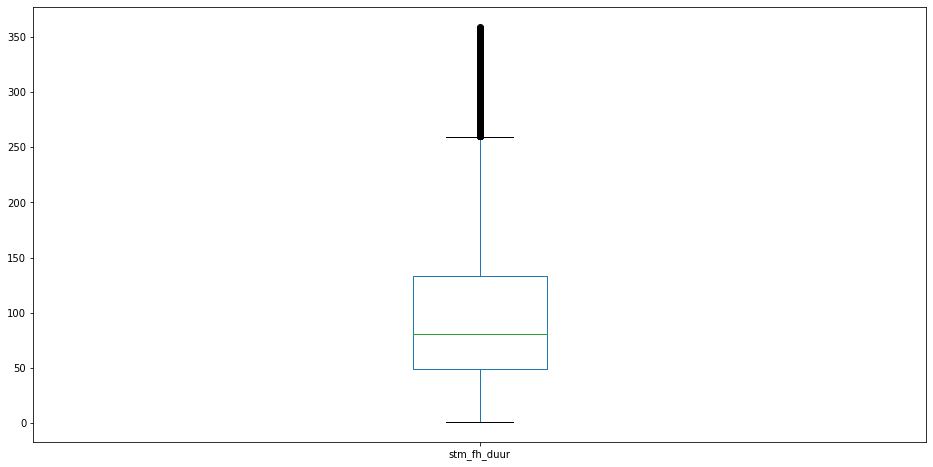

In [12]:
data_fht.plot.box(figsize=(16,8))

In [13]:
len(data_fht[data_fht < data_fht.mean()])

6720

In [14]:
len(data_fht[data_fht < data_fht.mean()])/len(data_fht)*100

61.58922188616992

In [15]:
len(data_fht[data_fht < data_fht.median()])/len(data_fht)*100

49.7479607735313

61% van alle herstel tijden zit onder het gemiddelde 102 min

50% van alle herstel tijden zit onder de mediaan 82 min



In [16]:
data_fht = data_fht.to_frame()
data_fht['mediaan'] = data_fht['stm_fh_duur'].median()
data_fht['mean'] = data_fht['stm_fh_duur'].mean()
data_fht.head()

,stm_fh_duur,mediaan,mean
37,2.0,81.0,100.125836
44,3.0,81.0,100.125836
45,4.0,81.0,100.125836
47,17.0,81.0,100.125836
62,70.0,81.0,100.125836


In [17]:
# de score bepalen aan de hand van de RSME
np.sqrt(mean_squared_error(data_fht.loc[:,'stm_fh_duur'],data_fht.loc[:,'mean']))

73.38433098156776

In [18]:
#de score bepalen aan de hand van de RSME
np.sqrt(mean_squared_error(data_fht.loc[:,'stm_fh_duur'],data_fht.loc[:,'mediaan']))

75.83572804585508

# KNeighborsregression

In [19]:
data_KN = df_filtered[['stm_km_van_mld', 'stm_prioriteit']]

In [20]:
df_filtered['stm_sap_meld_ddt'] = df_filtered['stm_sap_meld_ddt'].apply(pd.to_datetime)

In [21]:
df_year = pd.DataFrame(df_filtered['stm_sap_meld_ddt'].dt.year)
df_filtered.insert(5, 'Jaar', df_year)

In [22]:
df_day = pd.DataFrame(df_filtered['stm_sap_meld_ddt'].dt.dayofyear)
df_filtered.insert(6, 'Dag_van_jaar', df_day)

In [23]:
df_filtered

,Unnamed: 0,#stm_sap_meldnr,stm_mon_nr,stm_vl_post,stm_sap_meld_ddt,Jaar,Dag_van_jaar,stm_sap_meldtekst_lang,stm_sap_meldtekst,stm_geo_mld,...,stm_fh_dd,stm_fh_tijd,stm_fh_duur,stm_sap_storeinddatum,stm_sap_storeindtijd,stm_oorz_tekst_kort,stm_pplg_van,stm_pplg_naar,stm_dstrglp_van,stm_dstrglp_naar
37,304,50053724,179.0,ZL,2006-01-30 15:41:00,2006,30,Logboeknr RBV : 179 Tijd: 1541 VL-Post: ...,Logboeknr RBV : 179 Tijd: 1541 VL-P,606,...,30/01/2006,15:43:00,2.0,30/01/2006,15:43:00,NaN,NaN,NaN,Aml,NaN
44,389,50053843,359.0,AMR,2006-07-02 16:18:00,2006,183,Logboeknr RBV : 359 Tijd: 1618 VL-Post: ...,Logboeknr RBV : 359 Tijd: 1618 VL-P,82,...,07/02/2006,16:21:00,3.0,07/02/2006,16:21:00,Muizen hebben kabel aangevreten,NaN,NaN,Sptz,NaN
45,390,50053844,293.0,AMR,2006-07-02 11:06:00,2006,183,Logboeknr RBV : 293 Tijd: 1106 VL-Post: ...,Logboeknr RBV : 293 Tijd: 1106 VL-P,75,...,07/02/2006,11:10:00,4.0,07/02/2006,11:10:00,Overweg km 54.0 in storing.,NaN,NaN,Utg,NaN
47,395,50053852,287.0,AH,2006-07-02 10:30:00,2006,183,Logboeknr RBV : 287 Tijd: 1030 VL-Post: ...,Logboeknr RBV : 287 Tijd: 1030 VL-P,47,...,07/02/2006,10:47:00,17.0,08/02/2006,12:47:00,Geen SMC-melding.,NaN,NaN,Rs,Ow
62,514,50054041,197.0,ZL,2006-02-20 21:56:00,2006,51,Logboeknr RBV : 197 Tijd: 2156 VL-Post: ...,Logboeknr RBV : 197 Tijd: 2156 VL-P,603,...,20/02/2006,23:06:00,70.0,20/02/2006,23:06:00,NaN,NaN,NaN,Zl,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89801,908084,99002830,103.0,KFH,2006-08-04 20:34:00,2006,216,Whv-Brdv spoor MB-MC thv km 201.2 vrij toegan...,Whv-Brdv spoor MB-MC thv km 201.2 vrij t,950,...,08/04/2006,21:35:00,54.0,08/04/2006,21:47:00,NaN,NaN,NaN,BRDV,NaN
89803,908102,99002849,8316.0,UT,2007-01-20 09:24:00,2007,20,Mda-Zhm:na bij overloop wissels Mda div hangd...,Mda-Zhm:na bij overloop wissels Mda div,107,...,22/01/2007,08:25:00,2820.0,22/01/2007,08:26:00,NaN,MDAZ,NaN,MDAZ,NaN
89831,908439,99003180,2274374.0,RTD,2013-11-20 00:24:00,2013,324,Rtd : Wl-263A t.o.b.s.,Rtd : Wl-263A t.o.b.s.,555,...,20/11/2013,04:30:00,246.0,21/11/2013,11:43:00,Status gewijzigd van Concept naar Compl,NaN,WSPL,RTD,20/11/2013
89840,908516,99003207,3669429.0,MT,2016-05-21 13:17:56,2016,142,[2+] Mtr-Edng : Sp-Sb/TB t.o.b.s. alle ovw'en ...,[2+] Mtr-Edng : Sp-Sb/TB t.o.b.s. alle o,71,...,21/05/2016,14:35:00,175.0,21/05/2016,14:50:00,Gestoord object: SECTIE 913AT. Gestoord,MTR,NaN,MTR,EDN


# linear regression 

In [24]:
afstand = ['stm_km_tot_mld']
tijd = ['stm_fh_duur']
X= df_filtered[afstand]
y= df_filtered[tijd]

In [25]:
# de data splitsen in training en testing data
from sklearn.model_selection import train_test_split
# test_size
X_train, X_test, y_train,y_test = train_test_split(X,y, test_size=0.25, random_state=None) 

In [26]:
from sklearn.linear_model import LinearRegression

In [27]:
linear_reg_model = LinearRegression()

In [28]:
linear_reg_model.fit(X_train, y_train)

LinearRegression()

In [29]:
from sklearn.metrics import mean_squared_error

y_pred_test = linear_reg_model.predict(X_test)

error_metric = mean_squared_error(y_pred=y_pred_test, y_true=y_test)
print(error_metric)

12173968.924313966


# extra tree classifier

In [30]:
from sklearn.ensemble import ExtraTreesClassifier

In [31]:
afstand = ['stm_km_tot_mld']
tijd = ['stm_fh_duur']
X= df_filtered[afstand]
y= df_filtered[tijd].values.ravel()

In [32]:
# de data splitsen in training en testing data
from sklearn.model_selection import train_test_split
# test_size
X_train, X_test, y_train,y_test = train_test_split(X,y, test_size=0.25, random_state=None) 

In [33]:
clf = ExtraTreesClassifier(n_estimators=100, random_state=0)

In [34]:
X_test

,stm_km_tot_mld
44565,0.0
35889,0.0
38237,0.0
41002,57700.0
81168,83421.0
...,...
88146,28806.0
68285,0.0
47621,0.0
72722,68980.0


In [35]:
y_test

array([5075.,   70.,   83., ...,  128.,  864.,   47.])

In [36]:
clf.fit(X_train, y_train)

MemoryError: could not allocate 95092736 bytes

In [ ]:
clf.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix 

In [ ]:
confusion_matrix(list(y_test), clf.predict(X_test))

In [ ]:
accuracy_score(list(y_test), clf.predict(X_test))

In [ ]:
y.shape

In [ ]:
X.shape